# Predicting outcome with Support Vector Machine

<b>Import Libraries</b>

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns

<b>Load Data-set File</b>

In [41]:
data = pd.read_csv(r"C:\Users\Priyanka V Eklaspure\Downloads\500_Person_Gender_Height_Weight_Index.csv")

<b>check First 5 Values</b>

In [42]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


<b>Check Last 5 Values</b>

In [43]:
data.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


<b>Statistical summary of data frame</b>

In [44]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [45]:
from sklearn import svm
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split

In [46]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [47]:
gender = LabelEncoder()
data['Gender'] = gender.fit_transform(data['Gender'])

In [48]:
data.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [49]:
bins = (-1,0,1,2,3,4,5)
health = ['malnourished' , 'underweight' , 'fit' , 'slightly overweight' , 'overweight' , 'extremly overweight']
data['Index'] = pd.cut(data['Index'] , bins = bins , labels = health)

In [50]:
data['Index']

0               overweight
1                      fit
2               overweight
3      slightly overweight
4      slightly overweight
              ...         
495    extremly overweight
496             overweight
497    extremly overweight
498    extremly overweight
499    extremly overweight
Name: Index, Length: 500, dtype: category
Categories (6, object): ['malnourished' < 'underweight' < 'fit' < 'slightly overweight' < 'overweight' < 'extremly overweight']

In [51]:
data['Index'].value_counts()

extremly overweight    198
overweight             130
fit                     69
slightly overweight     68
underweight             22
malnourished            13
Name: Index, dtype: int64

In [52]:
data['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

In [53]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<AxesSubplot:xlabel='Index', ylabel='count'>

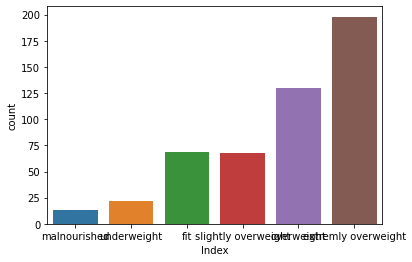

In [54]:
sns.countplot(data['Index'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

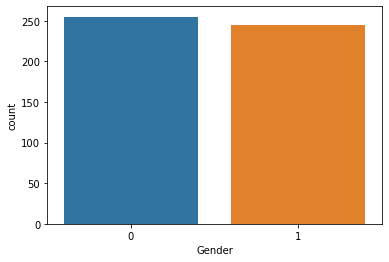

In [55]:
sns.countplot(data['Gender'])

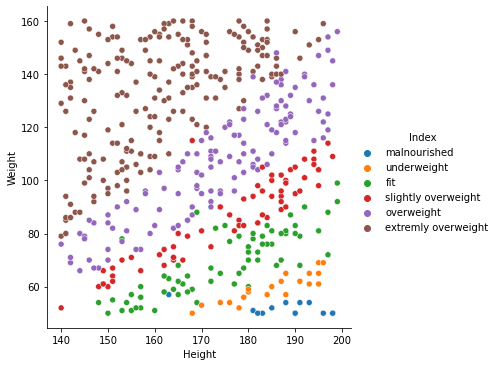

In [56]:
sns.relplot(x = 'Height' , y = "Weight" , hue = 'Index' , data = data)

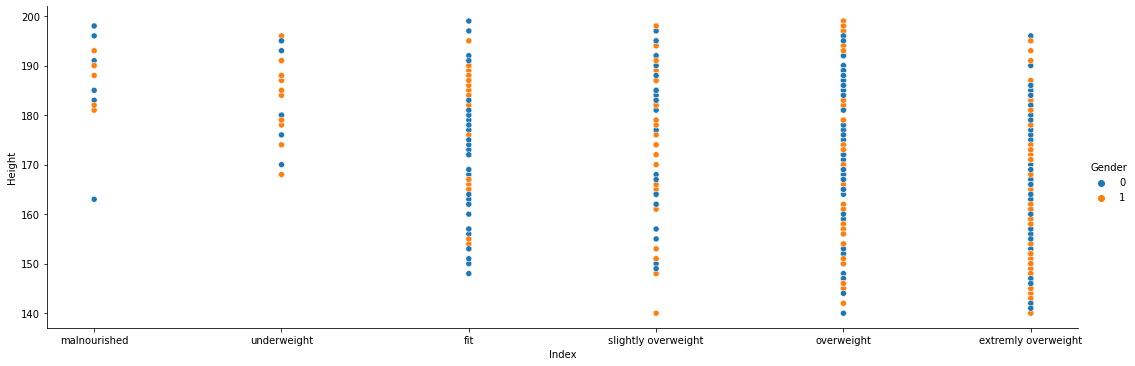

In [57]:
sns.relplot(x = 'Index' , y = 'Height' , hue = 'Gender' , data = data , height = 5 , aspect = 3)

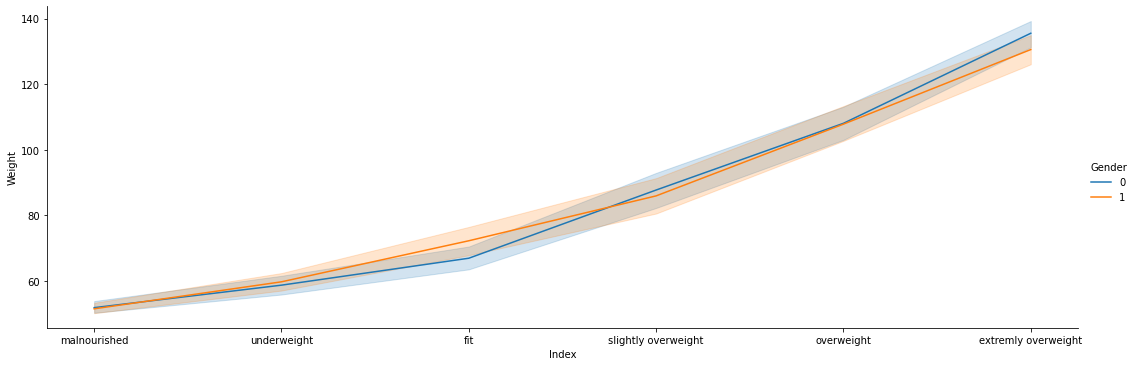

In [58]:
sns.relplot(x = 'Index' , y = 'Weight' , hue = 'Gender' , kind = 'line' , data = data , height = 5 , aspect = 3)

In [59]:
X = data.drop('Index' , axis = 1)
y = data['Index']

In [60]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.2 , random_state = 0)

In [61]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [62]:
clf = svm.SVC()
clf.fit(X_train , y_train)
pred = clf.predict(X_test)

In [65]:
print(classification_report(y_test , pred))

                     precision    recall  f1-score   support

extremly overweight       0.88      0.97      0.92        36
                fit       0.73      0.80      0.76        10
       malnourished       0.00      0.00      0.00         3
         overweight       0.96      0.78      0.86        32
slightly overweight       0.78      0.93      0.85        15
        underweight       0.60      0.75      0.67         4

           accuracy                           0.85       100
          macro avg       0.66      0.71      0.68       100
       weighted avg       0.84      0.85      0.84       100



F:\Programs\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
print(confusion_matrix(y_test , pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [67]:
print(accuracy_score(y_test , pred))

0.85


In [75]:
a = [[0,185,110]]
a = s.transform(a)
b = clf.predict(a)

In [76]:
b

array(['overweight'], dtype=object)

In [77]:
data

,Gender,Height,Weight,Index
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly overweight
4,1,149,61,slightly overweight
...,...,...,...,...
495,0,150,153,extremly overweight
496,0,184,121,overweight
497,0,141,136,extremly overweight
498,1,150,95,extremly overweight
